<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>
2022.09.13 ver.0.13 by fur.   StdErr evaluated in G/D height ratio <br>
2023.12.20 ver 0.14 by fur.   compornent l4 (at 1500cm-1) added to fit low G/D spectra <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [2]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"
# with open(INFILE, "r") as f:
#     print(f.read())

In [3]:
from ipyfilechooser import FileChooser
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='F:\src\ramanfit', filename='', title='', show_hidden=False, select_desc='Select', change_des…

In [77]:
INFILE = fc.selected
INFILE

'E:\\Users\\fur\\data\\20240329\\CFC20240329_position2_ObjX50D1.txt'

In [78]:
data = np.loadtxt(INFILE, delimiter='\t')

In [79]:
#print(data)

In [80]:
x = data[:,0]
y = data[:,1]

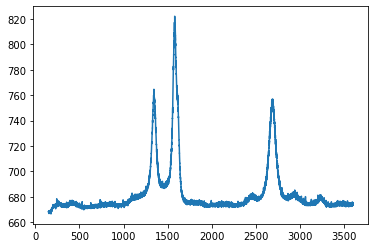

In [81]:
plt.plot(x,y);plt.show()

In [82]:
xDGindex1000=0
xDGindex1000=np.searchsorted(x,1000)
xDGindex1000

6343

In [83]:
xDGindex1800=0
xDGindex1800=np.searchsorted(x,1800)
xDGindex1800

12312

In [84]:
xDG = data[xDGindex1000:xDGindex1800,0]
yDG = data[xDGindex1000:xDGindex1800,1]

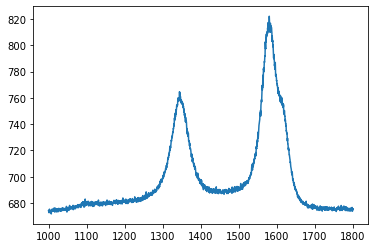

In [85]:
plt.plot(xDG,yDG);plt.show()

In [86]:
# LMFIT

In [87]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [88]:
lorentz1 = LorentzianModel(prefix='l1_')  # D peak
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1350, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [89]:
lorentz2 = LorentzianModel(prefix='l2_')  # G peak
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1570, min=1520, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=20000, min=5)
#pars

In [90]:
lorentz3 = LorentzianModel(prefix='l3_') # G' peak
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1620, min=1600, max=1660)
pars['l3_sigma'].set(value=10, min=5, max=200)
pars['l3_amplitude'].set(value=1000, min=5, max=1500)
#pars

In [91]:
lorentz4 = LorentzianModel(prefix='l4_')
pars.update(lorentz4.make_params())

pars['l4_center'].set(value=1500, min=1450, max=1520)
pars['l4_sigma'].set(value=10, min=5, max=100)
pars['l4_amplitude'].set(value=1000, min=5)

In [92]:
mod = lorentz1 + lorentz2 + lorentz3 + lorentz4 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [93]:
#print(out.fit_report())

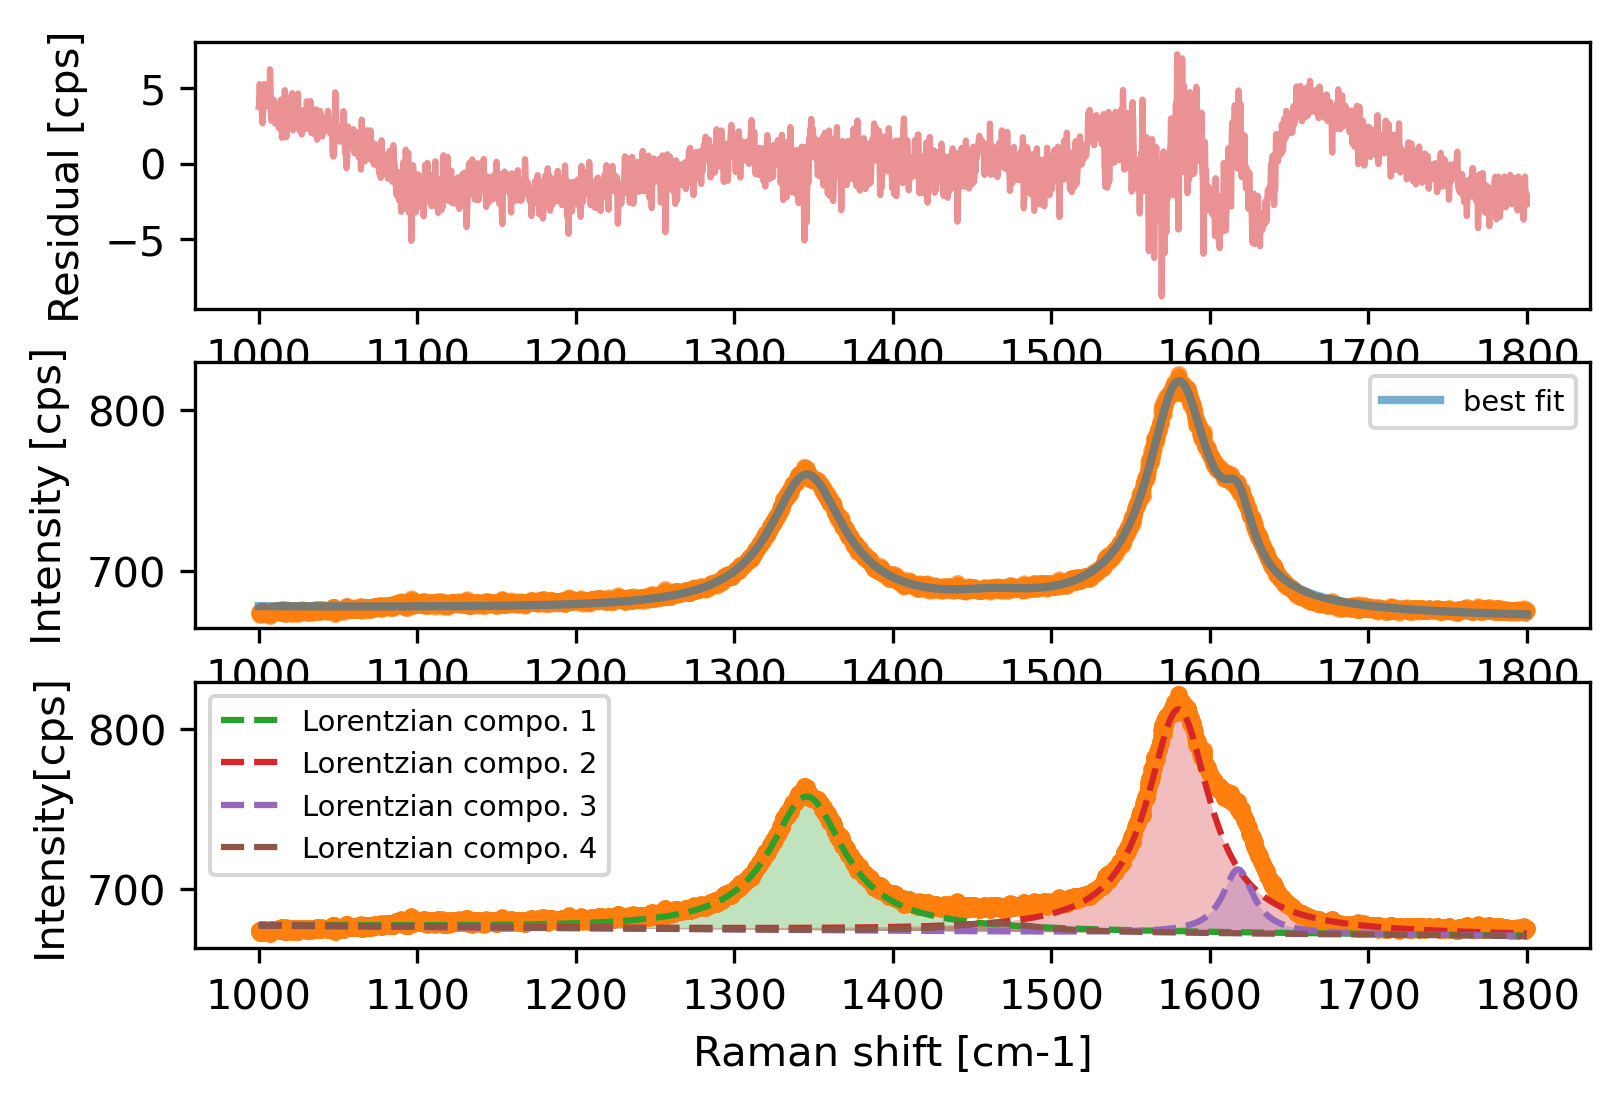

In [94]:
fig, ax = plt.subplots(3,1,dpi=300)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)
ax[2].plot(xDG, comps['l4_']+comps['lin_'], 'C5--', label='Lorentzian compo. 4')
ax[2].fill_between(xDG, comps['l4_']+comps['lin_'], comps['lin_'],facecolor='C5',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best', fontsize='x-small')
ax[2].legend(loc='best', fontsize='x-small')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [95]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.008117 +/- 0.000131 
lin_intercept = 685.200023 +/- 0.176922 
l1_amplitude = 7570.068151 +/- 20.629648 
l1_center = 1345.786066 +/- 0.054938 
l1_sigma = 28.818181 +/- 0.093023 
l1_fwhm = 57.636362 +/- 0.186045 
l1_height = 83.614841 +/- 0.154574 
l2_amplitude = 10600.276476 +/- 35.897560 
l2_center = 1580.208315 +/- 0.047178 
l2_sigma = 24.079182 +/- 0.077085 
l2_fwhm = 48.158364 +/- 0.154169 
l2_height = 140.128221 +/- 0.190560 
l3_amplitude = 1499.999994 +/- 22.055657 
l3_center = 1617.713196 +/- 0.085458 
l3_sigma = 11.865013 +/- 0.160164 
l3_fwhm = 23.730026 +/- 0.320328 
l3_height = 40.241409 +/- 1.100384 
l4_amplitude = 562.373911 +/- 25.187924 
l4_center = 1463.810262 +/- 0.963480 
l4_sigma = 33.591188 +/- 1.768277 
l4_fwhm = 67.182375 +/- 3.536553 
l4_height = 5.329052 +/- 0.145427 


In [96]:
od=out.params
l1_height_stderr=od['l1_height'].stderr
l2_height_stderr=od['l2_height'].stderr
vd = out.params.valuesdict()
#vd
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [97]:
GDAreaRatio = l2_area / l1_area

In [98]:
l1_height = vd['l1_height']
l2_height = vd['l2_height']

In [99]:
GDHeightRatio = l2_height / l1_height

In [100]:
GDHeightRatioMax = (l2_height + l2_height_stderr) / (l1_height - l1_height_stderr)
GDHeightRatioMin = (l2_height - l2_height_stderr) / (l1_height + l1_height_stderr)
GDHeightRatioPlus = GDHeightRatioMax - GDHeightRatio
GDHeightRatioMinus = GDHeightRatio - GDHeightRatioMin

In [101]:
GDHeightRatioPlus

0.005387086956223364

In [102]:
GDHeightRatioMinus

0.005367206072814046

// Results

In [103]:
INFILE

'E:\\Users\\fur\\data\\20240329\\CFC20240329_position2_ObjX50D1.txt'

In [104]:
GDHeightRatio

1.6758773830038605

In [105]:
GDAreaRatio

1.1700180634477921

In [106]:
print(INFILE)
print("G/D Height Ratio = %f +/- %f" % (GDHeightRatio, GDHeightRatioPlus))
print("G/D Area Ratio = %f" % GDAreaRatio)

E:\Users\fur\data\20240329\CFC20240329_position2_ObjX50D1.txt
G/D Height Ratio = 1.675877 +/- 0.005387
G/D Area Ratio = 1.170018
